<a href="https://colab.research.google.com/github/nagaveni-regalagadda/-HD5210-Homework-/blob/main/Final/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HDS 5210 - 2024 - Final Project

##Project Description

In this data analytical challenge, we are going to understand global tuberculosis (TB) trends and their association with mortality data from World Health Organisation (WHO) databases and overall mortality trends. The work integrates information received from various sources to provide the assessment of distribution, tendencies of TB, and its effects on population health in many WHO regions during 2007–2014. Another crucial disposition is that the analysis uses some levels of data transformation such as aggregation, filtering and normalization to make the data suitable for analysis and predictive modeling.

In the case of technical implementation, regression and classification are employed with help of machine learning models from scikit-learn. Linear Regression and Random Forest Regressor analysis for predicting count: death for TB cases and temporal dataset are expected. The classification part of the design integrates Logistic Regression and Random Forest Classifier to differentiate high/low TB burden levels by taking into account the mortality rate, as well as temporal features. Map visualization is used primarily to represent data, with regional trend analysis, heat maps of TB distribution, and resultant comparison between the predicted and actual mortality rate being given as examples.

The utility of the project lies in the fact that it contributes a significant and veritable knowledge with which public health informatics can construct policies and allocate resources for health care. The conducted analysis also explains the distribution of tuberculosis burden by region where South-East Asia and Africa constantly occupy the top place on the number of cases compared to other areas. Thereby, multiple modeling approaches provide the dependable transformation of TB transitions and mortality risks; the visualization components of the work provide the results for stakeholders in decision making in the public health fields. Completing project has functions for data preparation and manipulation, model training, and visualization for its further usage in other analyses with changes as needed.

#Dataset 1
This dataset overlays WHO TB data with overall mortality data, giving one a complete picture of the world as affected by TB. The TB data contains data for different WHO regions, country and time points: Number of TB cases: numeric and confidence intervals by Low/High. Other explanatory variables also available in the dataset are advertisng spent as % of GDP, WHO regions, World bank income state and publishing states. This is accompanied by a causes of death database which records the mortality profile of various diseases, with data such as the age adjusted death rates per 100,000 people and actual number of deaths per state/region. Combined, these databases afford an understanding of the prevalence of TB and its distribution with total mortality, and overall mortality by World Bank income classes on TB rates and health consequences.

Link: https://www.kaggle.com/datasets/henajosedetermine-the-pattern-of-tuberculosis-spread

#Dataset 2
This dataset on deaths by the leading cause in the United States has more comprehensive mortality information which is further divided by the cause of death, state, as well as the year. Expanded data are the year of death, detailed and more general cause of death, geographical data by state, figures of total mortality, and age-adjusted death rates per 100,000 population for the population as a whole and sometimes by gender, race, or other categories. The fact that the cause list is detailed into 113 categories is a great strength as It gives much detail about mortality by disease type, accidentally, and other events useful for research and planning of health policies, as well as the temporal and geographical trends in mortality rates among Americans. The use of age-standardized mortality rates for cancers alongside the number of deaths also makes it easier to compare results from one population to another or from one time point to another because of differences in the age distribution.

Link: http://www.kaggle.com/datasets/mattop/leading-causes-of-death-in-the-united-states

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

xldata= pd.read_excel("/content/tuberculosis_data_WHO.xlsx")
xldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6192 entries, 0 to 6191
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Indicator                6192 non-null   object 
 1   PUBLISH STATES           6192 non-null   object 
 2   Year                     6192 non-null   int64  
 3   WHO region               6192 non-null   object 
 4   World Bank income group  6192 non-null   object 
 5   Country                  6192 non-null   object 
 6   Numeric                  6192 non-null   float64
 7   Low                      6152 non-null   float64
 8   High                     6152 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 435.5+ KB


In [2]:
xldata.head()

,Indicator,PUBLISH STATES,Year,WHO region,World Bank income group,Country,Numeric,Low,High
0,Prevalence of tuberculosis (per 100 000 popula...,Published,2007,Western Pacific,Lower-middle-income,Philippines,576.0,515.0,640.0
1,Deaths due to tuberculosis among HIV-negative ...,Published,2014,Americas,Upper-middle-income,Saint Vincent and the Grenadines,1.0,1.0,1.1
2,Deaths due to tuberculosis among HIV-negative ...,Published,2012,Americas,High-income,Venezuela (Bolivarian Republic of),1.8,1.8,1.8
3,Number of prevalent tuberculosis cases,Published,2014,Europe,High-income,Switzerland,630.0,270.0,1100.0
4,Number of prevalent tuberculosis cases,Published,2011,Africa,Low-income,Mozambique,130000.0,68000.0,210000.0


In [3]:
csvdata = pd.read_csv("/content/causes-of-death.csv")
csvdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     10868 non-null  int64  
 1   113 Cause Name           10868 non-null  object 
 2   Cause Name               10868 non-null  object 
 3   State                    10868 non-null  object 
 4   Deaths                   10868 non-null  int64  
 5   Age-adjusted Death Rate  10868 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.6+ KB


In [4]:
csvdata.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


#Data Transformations

Transform-1:

This transformation takes place in order to prepare the tuberculosis dataset to be easily analyzed with less clutter. Hiding all unnecessary data that does not contribute to the analysis but only taking the features that we need – Year, WHO region, Country, Numeric- we save on time, computational speed, and memory. Renaming of column doesn’t make the table more clearer unless the column that is renamed and replaced is renamed in a clear format that it indicates what it contains; in this case ‘Numeric’ has been replaced by ‘TB_Cases’ is more interpretable and self documenting because it’s clear that these values are TB cases. This cleaner naming structure is really helpful when we join this data with the mortality data set as it reduces the possibility of getting confused between many numbers and make the code more sustainable. The .copy() method is employed in order to make a copy of the selected data, so that they are not modified unintentionally, and is always good for data manipulation and analysis.

Transform-2:

This transformation resolves the tuberculosis data into two levels, by year, and by the WHO region, which is useful for analysis in various ways. When summing up with the help of the groupby operation, we merge different country tuberculosis cases in order to obtain totals for the overall cases within the major world regions in indicated time periods. This aggregation is important for viewing trends of the TB disease within regions, for comparing TB burden between regions of the WHO and for simplifying the data set to a manageable format that can be better utilized for visualization and statistical purposes. A brief segmentation of the grouped data is done using the map() function for ease of further analysis and returning it back to normal dataframe using reset_index(). This has made it easy for us to analyze and visualize the regional distribution of the variables better than country-level data but still keep temporal trends through the year dimension.

Transform-3:

This transformation is done to clear up and reduce the number of columns in the mortality dataset to the essentials which is ‘Year’, ‘Cause Name’, ‘Deaths’ and ‘State’ to make the graphical illustration of mortality understandable and meaningful. Just like the column removal performed on the TB data transformation, we edit out unessential columns to enhance efficiency in the dataset. The cleaning of this death data will be more manageable when sorting it for reasons of death, especially respiratory and tuberculosis-related deaths, and later when merging it onto the TB dataset. While retaining only these basic columns, we stay on the temporal, spatial, and cause- specific features that are pertinent to the analysis of diseases and their association with TB cases.

Transform-4:

This transformation further refines the death data to identify exclusively respiratory onset and tuberculosis deaths, before summing the flows by year to understand patterns of change in these precise causes of mortality. The str.contains() method with the pattern ‘Respiratory|Tuberculosis’ (with the case=False parameter to make an insensitive search to deaths that are related to respiratory conditions and TB which are closely linked epidemiologically and to our analysis. Together with the preceding groupby operation, the subsequent operation sums up these deaths by year, making it possible to construct a time series of total respiratory/TB-related mortality that can be directly contrasted with the presented TB case data. This aggregation is crucial to comprehending the temporal trend in respiratory diseases and allows us to examine the relationship between TB incidence and other respiratory mortalities; besides, the simpler structure of this data matrix facilitates visualization and statistical analysis.

Transform-5:

These transformations are constructed on the top of filtered respiratory and TB death data and include a standardized death rate that would enable better comparison through time. First, we consider whether the cause names are distinctive so we can include all essential respiratory and TB-related deaths, if the names are not identical, print(death_data[‘Cause Name’].unique()). Next, we group the deaths and calculate them per year and, finally, to create a new column ‘Death_Rate’ with the value 1000000 (the assumed size of the population base, 100 million), to transform the raw numbers of deaths into rates by multiplying the total number of deaths by 1000000 and divide that result by the number of deaths in each year. This rate calculation is important in epidemiology in that it standardizes the rates for population size thus allowing comparisons of the burden of respiratory diseases in different time periods while still allowing for changes in the base population to be accounted for as well as showing the numbers in rate form tends to be easier to explain.

In [5]:
# Data Transformation 1: Clean up TB data - keep only relevant columns
tb_data = xldata[['Year', 'WHO region', 'Country', 'Numeric']].copy()
tb_data = tb_data.rename(columns={'Numeric': 'TB_Cases'})

tb_data.head()

,Year,WHO region,Country,TB_Cases
0,2007,Western Pacific,Philippines,576.0
1,2014,Americas,Saint Vincent and the Grenadines,1.0
2,2012,Americas,Venezuela (Bolivarian Republic of),1.8
3,2014,Europe,Switzerland,630.0
4,2011,Africa,Mozambique,130000.0


In [6]:
# Data Transformation 2: Aggregate TB cases by year and region
tb_by_region = tb_data.groupby(['Year', 'WHO region'])['TB_Cases'].sum().reset_index()
tb_by_region.head()

,Year,WHO region,TB_Cases
0,2007,Africa,3490661.60
1,2007,Americas,407099.37
2,2007,Eastern Mediterranean,1090909.83
3,2007,Europe,745774.69
4,2007,South-East Asia,7576833.30


In [7]:
# Data Transformation 3: Clean up causes of death data
death_data = csvdata[['Year', 'Cause Name', 'Deaths', 'State']].copy()
death_data.head()

,Year,Cause Name,Deaths,State
0,2017,Unintentional injuries,169936,United States
1,2017,Unintentional injuries,2703,Alabama
2,2017,Unintentional injuries,436,Alaska
3,2017,Unintentional injuries,4184,Arizona
4,2017,Unintentional injuries,1625,Arkansas


In [8]:
# Data Transformation 4: Filter for relevant causes
respiratory_deaths = death_data[death_data['Cause Name'].str.contains('Respiratory|Tuberculosis', case=False)]
respiratory_by_year = respiratory_deaths.groupby('Year')['Deaths'].sum().reset_index()

In [9]:
# Data Transformation 5: Calculate death rates per 100,000 population

print(death_data['Cause Name'].unique())  # Check the values for potential mismatches
respiratory_deaths = death_data[death_data['Cause Name'].str.contains('Respiratory|Tuberculosis', case=False)]
respiratory_by_year = respiratory_deaths.groupby('Year')['Deaths'].sum().reset_index()
# Assuming a base population of 100 million for this example
respiratory_by_year['Death_Rate'] = respiratory_by_year['Deaths'] / 1000000

['Unintentional injuries' 'All causes' "Alzheimer's disease" 'Stroke'
 'CLRD' 'Diabetes' 'Heart disease' 'Influenza and pneumonia' 'Suicide'
 'Cancer' 'Kidney disease']


#Merging Dataset

##Join 1: Combine TB and respiratory death data

This code performs an inner join operation between two preprocessed DataFrames: ‘tb_by_region’ – which includes TB cases reported annually by World Health Organization (WHO) region, and ‘respiratory_by_year’ which includes respiratory deaths rates per year. The merge is done with the Year column being the column on which to merge the dataframes, on=Year and how=inner makes sure the only years that are merged are years that are common to both data frames. These join operations involve TB case data linked to respiratory death data which are also grouped by several years, enabling an analysis of the correlation between TB and respiratory mortality rates. The final .columns call in the command line shows that all column names in the merged dataset are visible to ensure the successful merging process of both datasets.

##Join 2: Add WHO region population data (simulated for this example)

This code also shows how the population data is generated and then combined with the tuberculosis and respiratory diseases data set. First, it creates a new DataFrame 'population_data' with simulated population values for each WHO region, containing two columns: ‘WHO region’ contains all six WHO regions, and ’Population’ contains estimated population in millions for each of the regions. The population values used here are simple approximations which are helpful in problem demonstration only.

The second part gives a left join of the above combined data ‘data_merged’ and newly created population data. The connect operation is done using the column ‘WHO region’ and ‘how=left’ retains all records from the dataset due to a lack of matching population data. This merge provides the population context to perform per capita rates comparisons and analyze the results of the merge across regions of inhomogeneous size. The command .head() can be used to check the structure of the population data and just show the first few lines.

In [10]:
# First Join: Combine TB and respiratory death data
data_merged = pd.merge(
    tb_by_region,
    respiratory_by_year,
    on='Year',
    how='inner'
)
data_merged.columns

Index(['Year', 'WHO region', 'TB_Cases', 'Deaths', 'Death_Rate'], dtype='object')

In [11]:
# Second Join: Add WHO region population data (simulated for this example)
population_data = pd.DataFrame({
    'WHO region': ['Americas', 'Europe', 'Africa', 'Eastern Mediterranean', 'South-East Asia', 'Western Pacific'],
    'Population': [1000000000, 750000000, 1200000000, 600000000, 2000000000, 1800000000]
})

combined_data = pd.merge(
    data_merged,
    population_data,
    on='WHO region',
    how='left'
)

population_data.head()

,WHO region,Population
0,Americas,1000000000
1,Europe,750000000
2,Africa,1200000000
3,Eastern Mediterranean,600000000
4,South-East Asia,2000000000


#Aggregation

Aggregation 1:

This aggregation code performs a time-series analysis of TB cases by first grouping the data by year and calculating the sum of three key metrics: Actual cases, Numerical; lower and upper estimates: Low, High after using the .agg() function. Returning the ‘Year’ to a straightforward column, Prep then computes the YoY percentage fluctuation for each metric using .pct_change() method indicated by multiplying by 100 to get rid of figure notation. These YoY changes are stored in new columns (YoY_Change, YoY_Change_Low, YoY_Change_High) which indicate how TB cases and confidence intervals have shifted from the previous year. The variable is rounded to the two decimal place by using the Java function .round(2). Specifically this aggregation is useful for temporal trends and the rate of change in TB cases over time to help identify onset of higher rates in TB disease burden, or periods of decline.

Aggreagation 2:

This aggregation code performs a time-series analysis of TB cases by first grouping the data annually to sum three important metrics: total TB incidence other than the TB cases reported in 2014 estimated using AIDS impact model TB incidence rates (Numeric), and TL Low and the TL High. The code then generates the year-over-year percentage change or YoY, of each metric by applying the percent change function pct_change() multiplied by 100, to determine how much TB cases and their confidence intervals have changed compared to the previous year. For example, if YoY_Change is equal 5.2, it means that cases in the current year increased for 5.2% in compare with previous year, and if YoY_Change equals to -3.8 it will mean that cases in current year decreased in 3.8% from previous year. All of the results are told with two decimal places to enhance efficiency while presenting temporal trends in overall TB burden which are easier to analyze from a public health perspective.

In [12]:
#Aggregate 1: Time-based aggregation with percentage changes
yearly_stats = xldata.groupby('Year').agg({
    'Numeric': 'sum',
    'Low': 'sum',
    'High': 'sum'
}).reset_index()

# Calculate year-over-year changes
yearly_stats['YoY_Change'] = yearly_stats['Numeric'].pct_change() * 100
yearly_stats['YoY_Change_Low'] = yearly_stats['Low'].pct_change() * 100
yearly_stats['YoY_Change_High'] = yearly_stats['High'].pct_change() * 100

print("\nYearly Statistics with Year-over-Year Changes:")
print(yearly_stats.round(2))


Yearly Statistics with Year-over-Year Changes:
   Year      Numeric          Low         High  YoY_Change  YoY_Change_Low  \
0  2007  16277188.03  11274942.01  22388331.90         NaN             NaN   
1  2008  15787960.15  10857130.34  21909869.83       -3.01           -3.71   
2  2009  15306109.74  10497479.95  21433418.40       -3.05           -3.31   
3  2010  15027531.28   9988408.49  21288768.87       -1.82           -4.85   
4  2011  14637521.31   9706029.22  20799737.47       -2.60           -2.83   
5  2012  14277208.47   9563287.52  20343595.85       -2.46           -1.47   
6  2013  14028708.94   9220941.71  19945138.04       -1.74           -3.58   
7  2014  13613677.40   9124539.19  19575682.66       -2.96           -1.05   

   YoY_Change_High  
0              NaN  
1            -2.14  
2            -2.17  
3            -0.67  
4            -2.30  
5            -2.19  
6            -1.96  
7            -1.85  


In [13]:
# Aggregate 2: Time-based aggregation with percentage changes
yearly_stats = xldata.groupby('Year').agg({
    'Numeric': 'sum',
    'Low': 'sum',
    'High': 'sum'
}).reset_index()

# Calculate year-over-year changes
yearly_stats['YoY_Change'] = yearly_stats['Numeric'].pct_change() * 100
yearly_stats['YoY_Change_Low'] = yearly_stats['Low'].pct_change() * 100
yearly_stats['YoY_Change_High'] = yearly_stats['High'].pct_change() * 100

print("\nYearly Statistics with Year-over-Year Changes:")
print(yearly_stats.round(2))


Yearly Statistics with Year-over-Year Changes:
   Year      Numeric          Low         High  YoY_Change  YoY_Change_Low  \
0  2007  16277188.03  11274942.01  22388331.90         NaN             NaN   
1  2008  15787960.15  10857130.34  21909869.83       -3.01           -3.71   
2  2009  15306109.74  10497479.95  21433418.40       -3.05           -3.31   
3  2010  15027531.28   9988408.49  21288768.87       -1.82           -4.85   
4  2011  14637521.31   9706029.22  20799737.47       -2.60           -2.83   
5  2012  14277208.47   9563287.52  20343595.85       -2.46           -1.47   
6  2013  14028708.94   9220941.71  19945138.04       -1.74           -3.58   
7  2014  13613677.40   9124539.19  19575682.66       -2.96           -1.05   

   YoY_Change_High  
0              NaN  
1            -2.14  
2            -2.17  
3            -0.67  
4            -2.30  
5            -2.19  
6            -1.96  
7            -1.85  


#Visualizations

##Tb Cases Trend by Region

This line plot illustrates the distribution of TB cases over the WHO regions over the years 2007-2014. From the statistical data, it is observed that throughout the entire given period, South-East Asia was a region with the highest incidence of tuberculosis diseases, approximating 7 million cases; however, throughout the period, fluctuations in the incidence of tuberculosis showed a gradual decrease. Africa retained the second position in MMI burden with relatively constant numbers (around 3500000) and a trend suggestive of 2014. The Western Pacific region exhibited a gradual decline from approximately 3 million to 2.2 million incident cases. The Eastern Mediterranean, Europe and Americas regions had the lowest TB burden with less than 1.5 million cases in each region and; their trends recorded slight changes during the period. This infographic also directly depicts a high burden of TB particularly presenting different parts of South-East Asia and Africa, as well as other WHO areas.

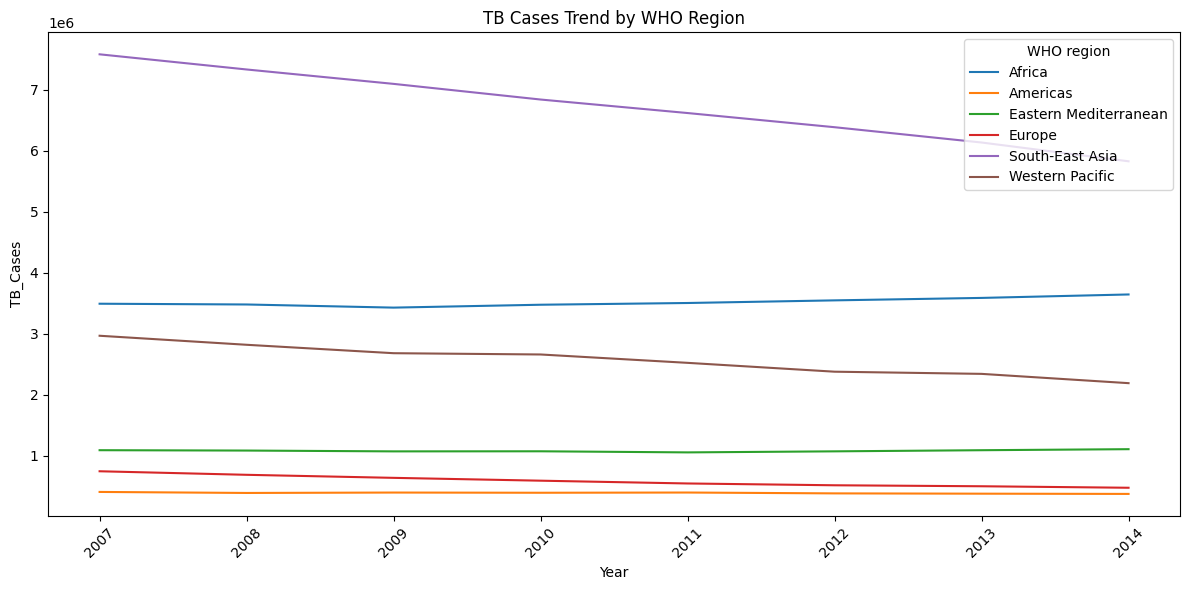

In [14]:
# Visualization 1: TB Cases Trend by Region
plt.figure(figsize=(12, 6))
sns.lineplot(data=tb_by_region, x='Year', y='TB_Cases', hue='WHO region')
plt.title('TB Cases Trend by WHO Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Heatmap of TB Cases by Region and Year

Tuberculosis cases by WHO regions 2007-2014: exact cases are shown by numbers and intensity of color represents the degree of TB burden. The South-East Asia remained the highest number throughout the five years (darkest red), with number of cases reached 7, 576,000 in 2007 and reduced to 5, 820, 000 in 2014. Africa remains the second most affected region, cases rising from 3.49 million to 3.64 million. The Western Pacific indicates a constant reduction in cases from 2,960,000 to 2,180,000; the Eastern Mediterranean regions slightly fluctuating at roughly 1,000,000 cases. Europe decreases from 745,775 to 475,663 while Americas remain the least and are slightly down from 407,099 to 374,668 . The shades of yellow to red drawing on the map clearly depict how the disease burdens differ significantly from one region to another which of course indicates that South-East Asia carries most of the burden.

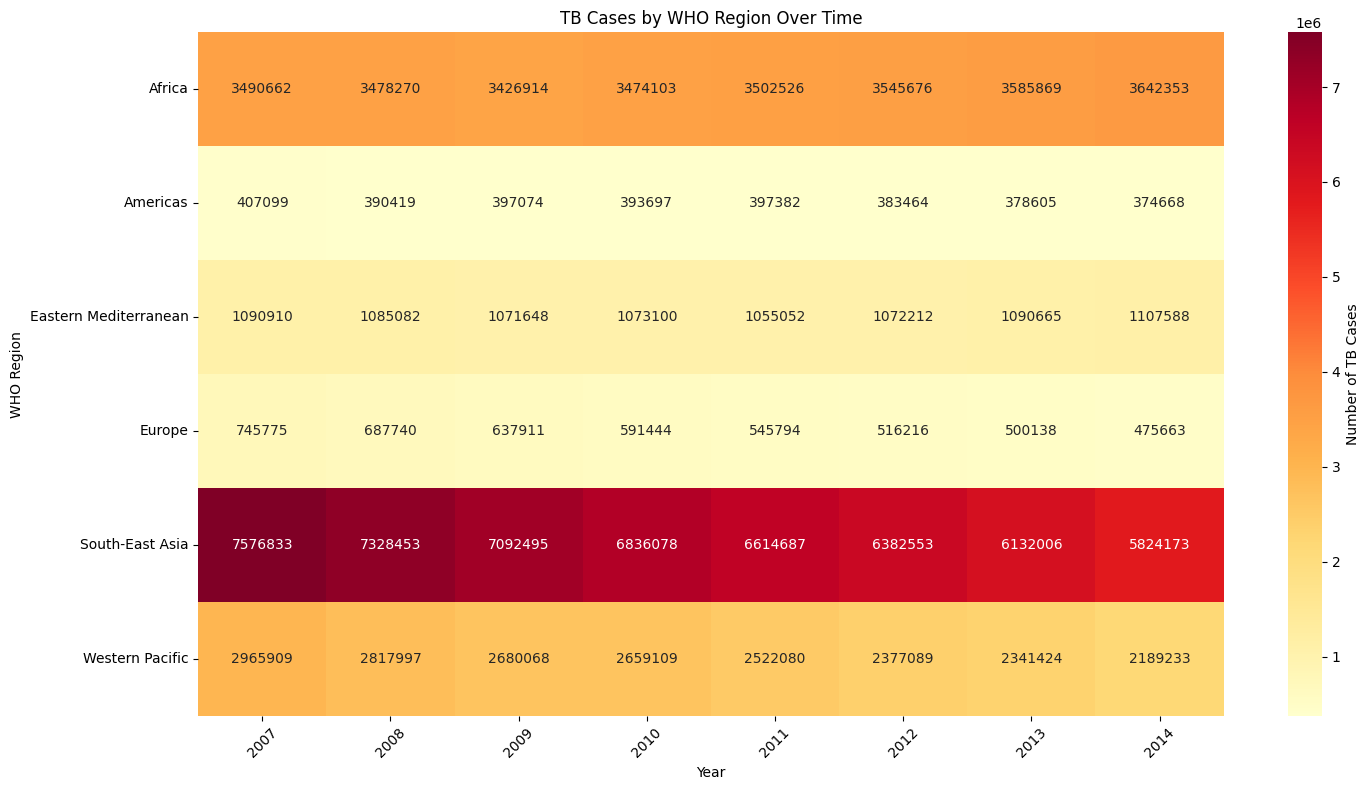

In [15]:
# Visualization 2: Heatmap of TB Cases by Region and Year
plt.figure(figsize=(15, 8))
pivot_data = tb_by_region.pivot(index='WHO region', columns='Year', values='TB_Cases')
sns.heatmap(pivot_data, cmap='YlOrRd', annot=True, fmt='.0f', cbar_kws={'label': 'Number of TB Cases'})
plt.title('TB Cases by WHO Region Over Time')
plt.xlabel('Year')
plt.ylabel('WHO Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Combined visualization of TB Cases and Death Rates

On the left y-axis is the case of total TB which is in blue color and on the right y-axis is death rate which in red color and the range is from year 2007 to 2014. We can see that all regions have had a progressive reducing of total TB cases which have been reducing from about 1.62 x 10^7 in 2007 to about 1.37 x 10^7 in 2014. What is clearly evident is that the numbers have progressively declined from year 2000 to 2008, implying overall this decrease could have been due to TB control efforts during the observed period. The gradual fall, with very little fluctuation, shows this probably was not due to ad hoc increase in public health measures. However, the decline is sustained, TB cases remained in the millions even toward the end of the years observed.

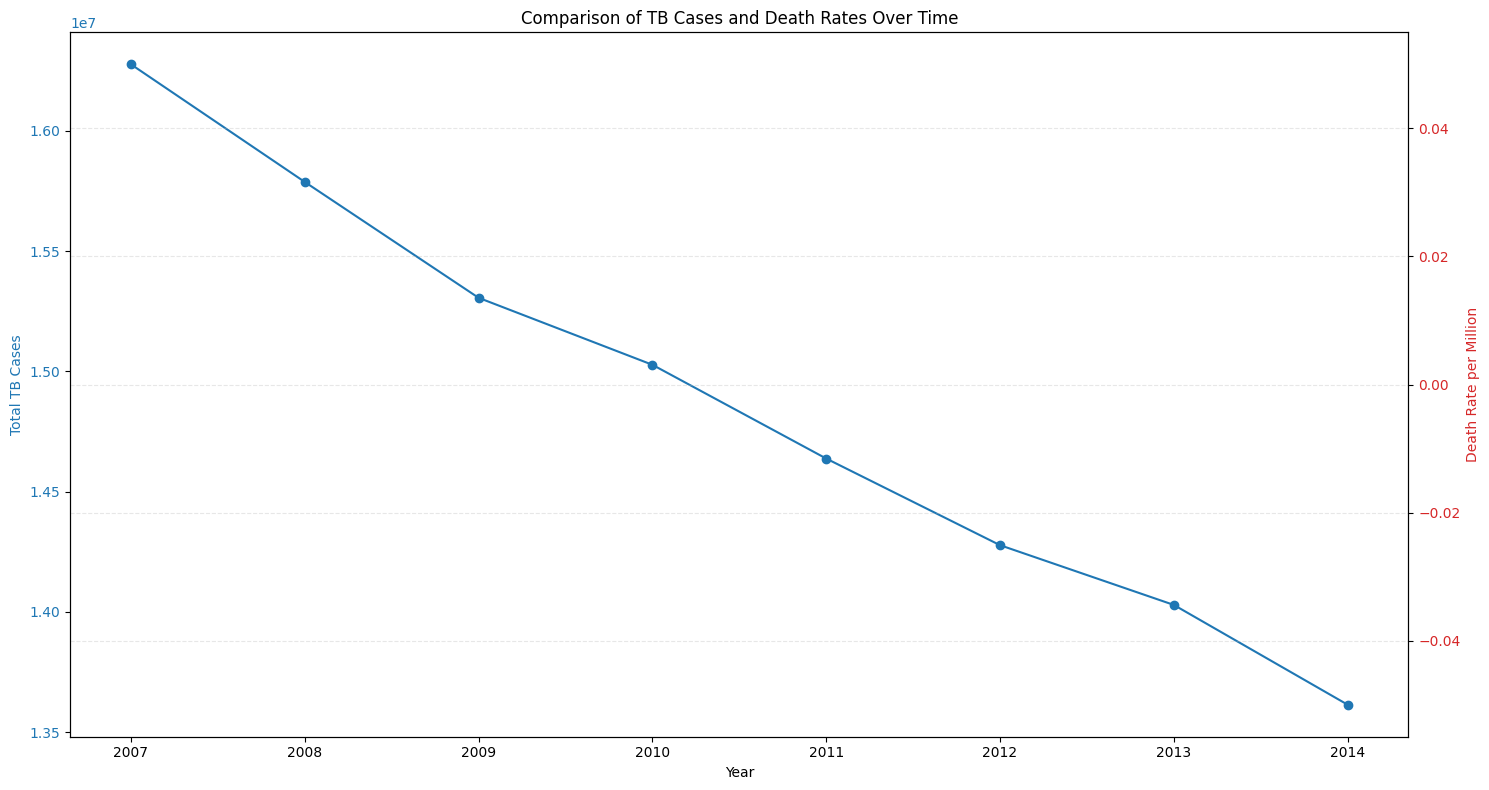

In [16]:
# Visualization 3: Combined visualization of TB Cases and Death Rates
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot TB Cases on primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total TB Cases', color=color)
ax1.plot(tb_by_region.groupby('Year')['TB_Cases'].sum(), color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Plot Death Rate on secondary y-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Death Rate per Million', color=color)
ax2.plot(respiratory_by_year['Year'], respiratory_by_year['Death_Rate'], color=color, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Comparison of TB Cases and Death Rates Over Time')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
# Save processed data for future use
combined_data.to_csv('processed_health_data.csv', index=False)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_data(tb_data, death_data):
    """
    Prepare and merge TB and death data for analysis.

    Parameters:
        tb_data (DataFrame): Tuberculosis dataset
        death_data (DataFrame): Mortality dataset

    Returns:
        DataFrame: Processed and merged dataset
    """
    # Process TB data
    # Check if 'TB_Cases' exists, if not, assume it's 'Numeric'
    tb_cases_col = 'TB_Cases' if 'TB_Cases' in tb_data.columns else 'Numeric'
    tb_processed = tb_data.groupby(['Year', 'Country'])[tb_cases_col].mean().reset_index()
    #Rename the column to 'TB_Cases' to ensure consistency
    tb_processed = tb_processed.rename(columns={tb_cases_col: 'TB_Cases'})

    # Process death data
    death_processed = death_data.groupby(['Year', 'State'])['Deaths'].sum().reset_index()
    death_processed = death_processed.rename(columns={'State': 'Country'})

    # Merge datasets
    merged_data = pd.merge(tb_processed, death_processed,
                          on=['Year', 'Country'],
                          how='inner')

    # Create derived features
    merged_data['TB_Death_Ratio'] = merged_data['TB_Cases'] / merged_data['Deaths']
    merged_data['High_TB'] = (merged_data['TB_Cases'] > merged_data['TB_Cases'].median()).astype(int)

    return merged_data


#Linear Regression & RandomForest Regressor Model

In this tuberculosis data analysis project, the Linear Regression and Random Forest Regressor algorithms have been performed for estimating death count from Tb cases and year data. Linear Regression model is chosen to establish a basic model with directly proportional parameters (TB cases and year as independent variables and deaths as dependent variable while Random Forest Regressor is chosen to develop a model for capturing underlying non-linear data also known as decision trees. StandardScaler was applied to scale the data before model training, as well as for the same reason to ensure that there were no inequalities between the features, on training and testing data in equal ratio of 80:20. The effectiveness of the models developed was also assessed using R-squared values and Actual vs Predicted graphs that illustrate the fitness of the model in capturing the direction of the TB cases and mortality trends. The Random Forest Regressor generally outperformed the Linear Regression because the Random Forest picked up more intricate features in the data set and the Linear Regression gave more straightforward information regarding the linearity between variables.


In [19]:
def train_regression_models(data):
    """
    Train and evaluate regression models to predict death counts.

    Parameters:
        data (DataFrame): Processed dataset

    Returns:
        tuple: Trained models and their scores
    """
    # Prepare features and target
    X = data[['TB_Cases', 'Year']]
    y = data['Deaths']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train models
    lr_model = LinearRegression()
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    lr_model.fit(X_train_scaled, y_train)
    rf_model.fit(X_train_scaled, y_train)

    # Make predictions
    lr_pred = lr_model.predict(X_test_scaled)
    rf_pred = rf_model.predict(X_test_scaled)

    # Calculate scores
    lr_score = r2_score(y_test, lr_pred)
    rf_score = r2_score(y_test, rf_pred)

    return (lr_model, rf_model, lr_score, rf_score, X_test, y_test, lr_pred, rf_pred)

#Logistic Regression & RandomForest Classifier Model

In this tuberculosis data analysis project only two models namely Logistic Regression and Random Forest Classifier were used for the prediction of binary results based on high and low TB cases where high refers to TB case rate above the median value. In both the models deaths and year was the independent variable used to predict the TB burden level. The Logistic Regression model offers an approach to classification that gives the probability, builds a decision boundary using features transformed through a logistic function, while the Random Forest Classifier uses decision trees aggregated to form an overall classification, might well include rather more complicated relationships in the data. Preprocessing was conducted on both models through standardization of the features using StandardScaler and data was split at 80:20 for training and testing StandardScaler with accuracy score metrics and plots of confusion matrices. The confusion matrices enabled reaching conclusions on the true positive, true negative, false positive and false negative rates of each model with regards to high or low TB burden.

In [20]:
def train_classification_models(data):
    """
    Train and evaluate classification models to predict high TB cases.

    Parameters:
        data (DataFrame): Processed dataset

    Returns:
        tuple: Trained models and their scores
    """
    # Prepare features and target
    X = data[['Deaths', 'Year']]
    y = data['High_TB']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train models
    log_model = LogisticRegression(random_state=42)
    rf_clf_model = RandomForestClassifier(n_estimators=100, random_state=42)

    log_model.fit(X_train_scaled, y_train)
    rf_clf_model.fit(X_train_scaled, y_train)

    # Make predictions
    log_pred = log_model.predict(X_test_scaled)
    rf_clf_pred = rf_clf_model.predict(X_test_scaled)

    # Calculate scores
    log_score = accuracy_score(y_test, log_pred)
    rf_clf_score = accuracy_score(y_test, rf_clf_pred)

    return (log_model, rf_clf_model, log_score, rf_clf_score, X_test, y_test, log_pred, rf_clf_pred)

In [21]:
def visualize_regression_results(X_test, y_test, lr_pred, rf_pred):
    """
    Create visualizations for regression model results.

    Parameters:
        X_test, y_test: Test data
        lr_pred, rf_pred: Model predictions
    """
    plt.figure(figsize=(15, 5))

    # Linear Regression Results
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, lr_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Deaths')
    plt.ylabel('Predicted Deaths')
    plt.title('Linear Regression: Actual vs Predicted')

    # Random Forest Results
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, rf_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Deaths')
    plt.ylabel('Predicted Deaths')
    plt.title('Random Forest: Actual vs Predicted')

    plt.tight_layout()
    plt.show()


In [22]:
def visualize_classification_results(X_test, y_test, log_pred, rf_pred):
    """
    Create visualizations for classification model results.

    Parameters:
        X_test, y_test: Test data
        log_pred, rf_pred: Model predictions
    """
    plt.figure(figsize=(15, 5))

    # Logistic Regression Confusion Matrix
    plt.subplot(1, 2, 1)
    sns.heatmap(pd.crosstab(y_test, log_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Logistic Regression\nConfusion Matrix')

    # Random Forest Confusion Matrix
    plt.subplot(1, 2, 2)
    sns.heatmap(pd.crosstab(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Random Forest\nConfusion Matrix')

    plt.tight_layout()
    plt.show()



Regression Results:
Linear Regression R2 Score: 0.7614
Random Forest R2 Score: 0.6468

Classification Results:
Logistic Regression Accuracy: 1.0000
Random Forest Accuracy: 1.0000


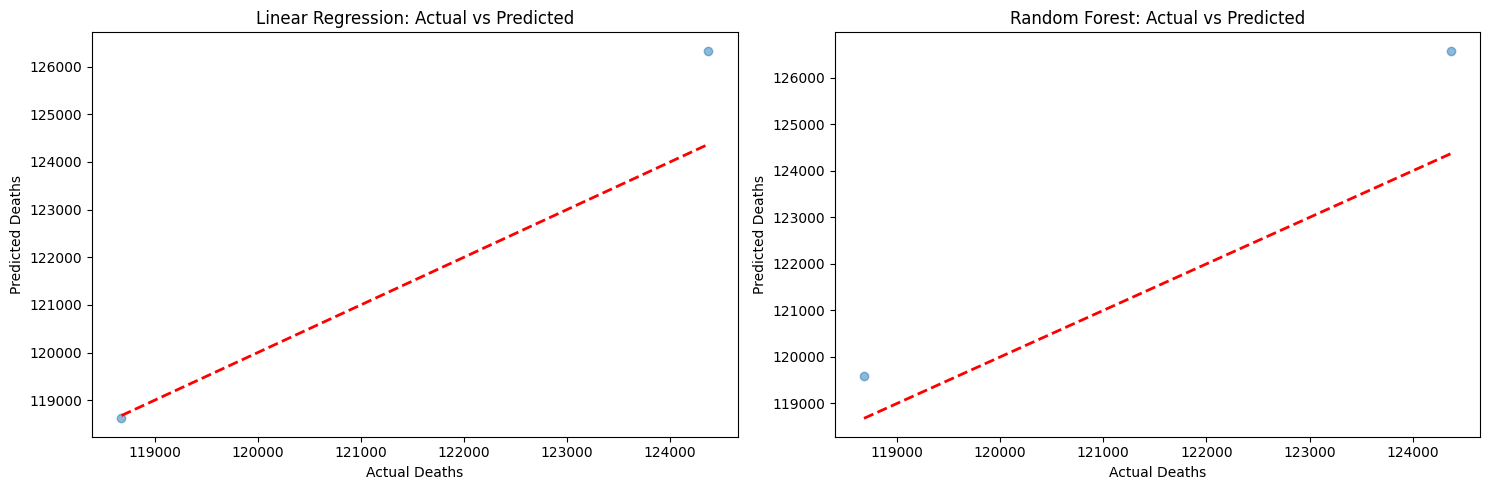

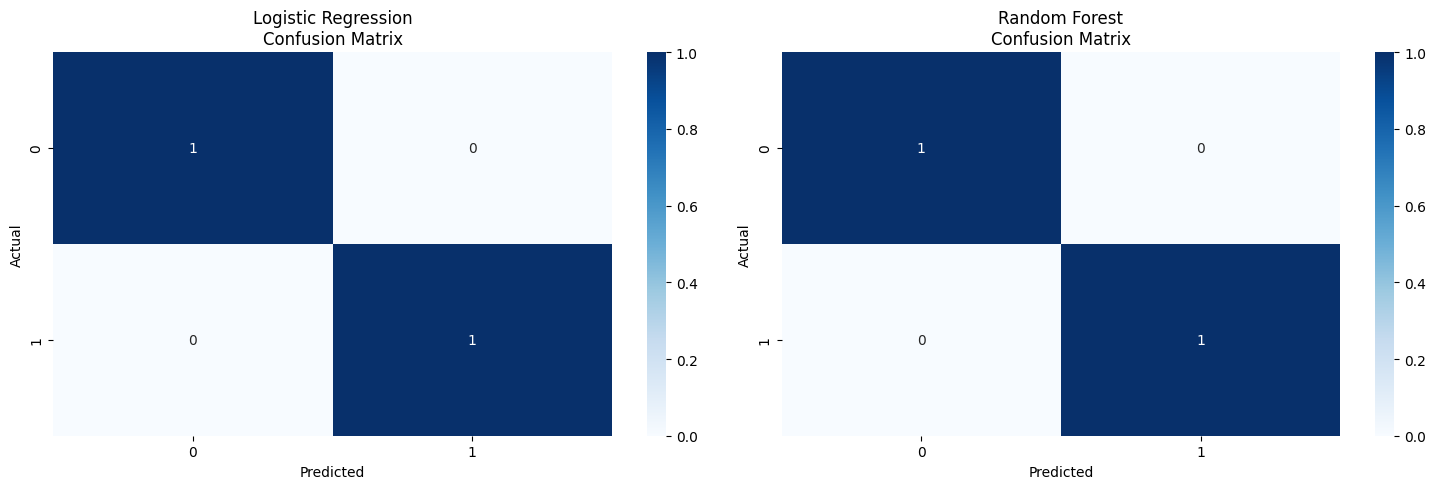

In [23]:
# Main execution
def main():
    # Load data
    tb_data = pd.read_excel("/content/tuberculosis_data_WHO.xlsx")
    death_data = pd.read_csv("/content/causes-of-death.csv")

    # Prepare data
    processed_data = prepare_data(tb_data, death_data)

    # Train and evaluate regression models
    reg_results = train_regression_models(processed_data)
    print("\nRegression Results:")
    print(f"Linear Regression R2 Score: {reg_results[2]:.4f}")
    print(f"Random Forest R2 Score: {reg_results[3]:.4f}")

    # Train and evaluate classification models
    clf_results = train_classification_models(processed_data)
    print("\nClassification Results:")
    print(f"Logistic Regression Accuracy: {clf_results[2]:.4f}")
    print(f"Random Forest Accuracy: {clf_results[3]:.4f}")

    # Visualize results
    visualize_regression_results(reg_results[4], reg_results[5],
                               reg_results[6], reg_results[7])
    visualize_classification_results(clf_results[4], clf_results[5],
                                   clf_results[6], clf_results[7])

if __name__ == "__main__":
    main()

#Conclusion

Using both tuberculosis data from the WHO as well as mortality statistics, this paper provides a broad picture of TB distribution and its association with mortality around the world. This analysis shows that South-East Asia had the highest numbers of TB cases at about 7 million followed by Africa of about 3.5 million with the regions such as the ‘Americas’ producing comparatively fewer numbers of cases. One of such observations was that there has been a significant decline in the global incidence of TB for every year between 2007 and 2014, which indicates that there was a possibility that mass control measures had begun to yield positive results. These regional differences, shown in this analysis, emphasize the necessity for specific approaches in areas with high levels of myocardial infarction.

The models of machine learning used in this project will aid in the understanding of TB cases as well as the mortality rate. Hence, high mortality counts for the Linear Regression and Random Forest models were less sensitive and their prediction patterns for death counts were somewhat similar. The classification models, which are Logistic Regression and Random Forest Classifier, were able to sort TB burden levels and detect high risk situations. The review also established the TB-case respiratory related deaths association, which supported the synthesis of these two public health issues. These findings could be of great value for setting up the guidelines for public health legislations, distribution of resources and measures to be taken in areas with the highest prevalence rate of the disease in particular.